# Парадокс Бертрана
Парадокс Бертрана — проблема классического определения теории вероятностей. Жозеф Бертран описал парадокс в своей работе Calcul des probabilités (1888) в качестве примера того, что вероятность не может быть чётко определена, пока не определён механизм или метод выбора случайной величины
#### Условие:
В круге случайным образом выбирается хорда.
Какова вероятность того, что её длина больше стороны правильного равностороннего треугольника, 
вписанного в этот круг?
Если радиус круга равен R, то длина стороны такого треугольника равна:
$$ 
L = \sqrt{3}R
$$
На первый взгляд кажется, что задача имеет единственный правильный ответ.
Однако при строгом рассмотрении оказывается, что результат зависит от того, что именно понимается под “случайной хордой”.

Разные естественные способы выбора хорд приводят к разным вероятностям, хотя геометрическая фигура остаётся той же.

Именно это противоречие между интуитивным ожиданием и формальным результатом и называется парадоксом Бертрана.
### Три классических способа выбора хорд
#### 1. Случайные концы на окружности
Метод «случайных концов»: наудачу выберем две точки на окружности и проведём через них хорду. Чтобы посчитать искомую вероятность, представим, что треугольник повёрнут так, что одна из его вершин совпадает с концом хорды. Заметим, что если другой конец хорды лежит на дуге между двумя другими вершинами треугольника, то длина хорды больше стороны треугольника. Длина рассмотренной дуги равна трети длины окружности, следуя классическому определению, искомая вероятность равна $\frac {1}{3}$
#### 2. Случайная точка на радиусе
Метод «случайного радиуса»: зафиксируем радиус окружности, наудачу выберем точку на радиусе. Построим хорду, перпендикулярную зафиксированному радиусу, проходящую через выбранную точку. Для нахождения искомой вероятности представим, что треугольник повёрнут так, что одна из его сторон перпендикулярна зафиксированному радиусу. Хорда длиннее стороны треугольника, если её центр ближе к центру, чем точка пересечения треугольника с зафиксированным радиусом. Сторона треугольника делит пополам радиус, следовательно вероятность выбрать хорду длиннее стороны треугольника $\frac{1}{2}$.
#### 3. Случайная середина хорды
Метод «случайного центра»: выберем наудачу произвольную точку внутри круга и построим хорду с центром в выбранной точке. Хорда длиннее стороны равностороннего треугольника, если выбранная точка находится внутри круга, вписанного в треугольник. Площадь вписанного круга есть 1/4 от площади большего, значит, исходная вероятность равна  $\frac{1}{4}$.


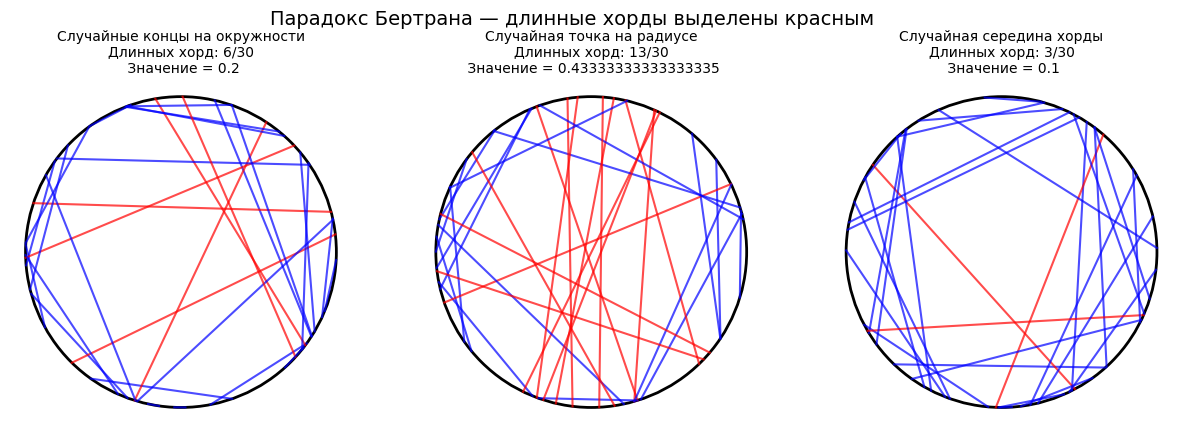

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

# === Настройки ===
R = 1.0        # радиус круга
N = 30         # количество хорд для визуализации
threshold = R * math.sqrt(3)  # сторона вписанного равностороннего треугольника

# === Вспомогательные функции ===
def chord_length(x1, y1, x2, y2):
    #Длина хорды.
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def draw_circle(ax):
    #Рисует круг радиуса R.
    circle = plt.Circle((0, 0), R, fill=False, color="black", linewidth=2)
    ax.add_artist(circle)

# === Методы выбора хорд ===
def method_random_endpoints():
    #1. Две случайные точки на окружности.
    a = random.random() * 2 * math.pi
    b = random.random() * 2 * math.pi
    return math.cos(a), math.sin(a), math.cos(b), math.sin(b)

def method_random_radius_point():
    #2. Случайная точка на радиусе, хорда перпендикулярна радиусу.
    theta = random.random() * 2 * math.pi
    d = random.random() * R
    alpha = theta + math.pi / 2
    x0, y0 = d * math.cos(theta), d * math.sin(theta)
    chord_half = math.sqrt(R**2 - d**2)
    x1, y1 = x0 + chord_half * math.cos(alpha), y0 + chord_half * math.sin(alpha)
    x2, y2 = x0 - chord_half * math.cos(alpha), y0 - chord_half * math.sin(alpha)
    return x1, y1, x2, y2

def method_random_midpoint():
    #3. Случайная середина хорды (равномерно по площади круга).
    u = random.random()
    r = R * math.sqrt(u)
    theta = random.random() * 2 * math.pi
    x0, y0 = r * math.cos(theta), r * math.sin(theta)
    ux, uy = -math.sin(theta), math.cos(theta)
    chord_half = math.sqrt(R**2 - r**2)
    x1, y1 = x0 + chord_half * ux, y0 + chord_half * uy
    x2, y2 = x0 - chord_half * ux, y0 - chord_half * uy
    return x1, y1, x2, y2

# === Подготовка визуализации ===
methods = [
    ("Случайные концы на окружности", method_random_endpoints),
    ("Случайная точка на радиусе", method_random_radius_point),
    ("Случайная середина хорды", method_random_midpoint)
]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (title, func) in zip(axes, methods):
    draw_circle(ax)
    count_long = 0
    for _ in range(N):
        x1, y1, x2, y2 = func()
        length = chord_length(x1, y1, x2, y2)
        color = "red" if length > threshold else "blue"
        if color == "red":
            count_long += 1
        ax.plot([x1, x2], [y1, y2], color=color, alpha=0.7, linewidth=1.5)
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.axis("off")
    ax.set_title(f"{title}\nДлинных хорд: {count_long}/{N}\n Значение = {count_long / N}", fontsize=10)

plt.suptitle("Парадокс Бертрана — длинные хорды выделены красным", fontsize=14)
plt.show()
